In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [202]:
europe = [
    "Albania",
    "Austria",
    "Belarus",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czechia",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Kosovo",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Russia",
    "Serbia",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Ukraine",
    "United Kingdom",
]

africa = [
    "Algeria",
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cape Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Congo",
    "Democratic Republic of Congo",
    "Djibouti",
    "Egypt",
    "Eswatini",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Ivory Coast",
    "Kenya",
    "Lesotho",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritania",
    "Mauritius",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Sao Tome and Principe",
    "Senegal",
    "Seychelles",
    "Sierra Leone",
    "Somalia",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Tanzania",
    "Togo",
    "Tunisia",
    "Uganda",
    "Zambia",
    "Zimbabwe",
]

asia = [
    "Armenia",
    "Azerbaijan",
    "Bangladesh",
    "Bhutan",
    "Brunei",
    "Cambodia",
    "China",
    "Georgia",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Israel",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Lebanon",
    "Malaysia",
    "Maldives",
    "Mongolia",
    "Myanmar",
    "Nepal",
    "North Korea",
    "Oman",
    "Pakistan",
    "Palestine",
    "Philippines",
    "Qatar",
    "Saudi Arabia",
    "Singapore",
    "South Korea",
    "Sri Lanka",
    "Syria",
    "Tajikistan",
    "Thailand",
    "Timor",
    "Turkey",
    "Turkmenistan",
    "United Arab Emirates",
    "Uzbekistan",
    "Vietnam",
    "Yemen",
]

north_america = [
    "Belize",
    "Canada",
    "Costa Rica",
    "Dominican Republic",
    "El Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Trinidad and Tobago",
    "United States",
]

south_america = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela",
]

oceania = [
    "Australia",
    "Fiji",
    "Kiribati",
    "Micronesia (country)",
    "Nauru",
    "New Zealand",
    "Papua New Guinea",
    "Samoa",
    "Solomon Islands",
    "Tonga",
    "Tuvalu",
    "Vanuatu",
]

continents = [europe, africa, asia, north_america, south_america, oceania]
continent_names = [
    "Europe",
    "Africa",
    "Asia",
    "North America",
    "South America",
    "Oceania",
]

In [203]:
# Load data and rename columns

poverty_data = pd.read_csv("../data/poverty-share-on-less-than-30-per-day.csv")
poverty_data.columns = ["Entity", "Code", "Year", "Percentage"]

poverty_data.head()

,Entity,Code,Year,Percentage
0,Albania,ALB,1981,99.91247
1,Albania,ALB,1982,99.91247
2,Albania,ALB,1983,99.91247
3,Albania,ALB,1984,99.91247
4,Albania,ALB,1985,99.91247


In [204]:
df = poverty_data[poverty_data.Entity.isin(europe)]

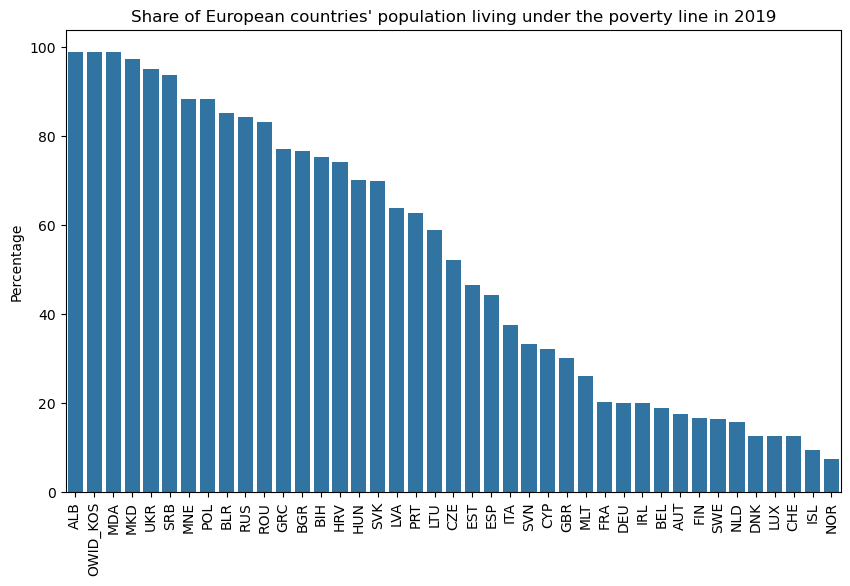

In [205]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Code",
    y="Percentage",
    data=df[df["Year"] == 2019].sort_values("Percentage", ascending=False),
)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Percentage")
plt.title(
    "Share of European countries' population living under the poverty line in 2019"
)
plt.show()

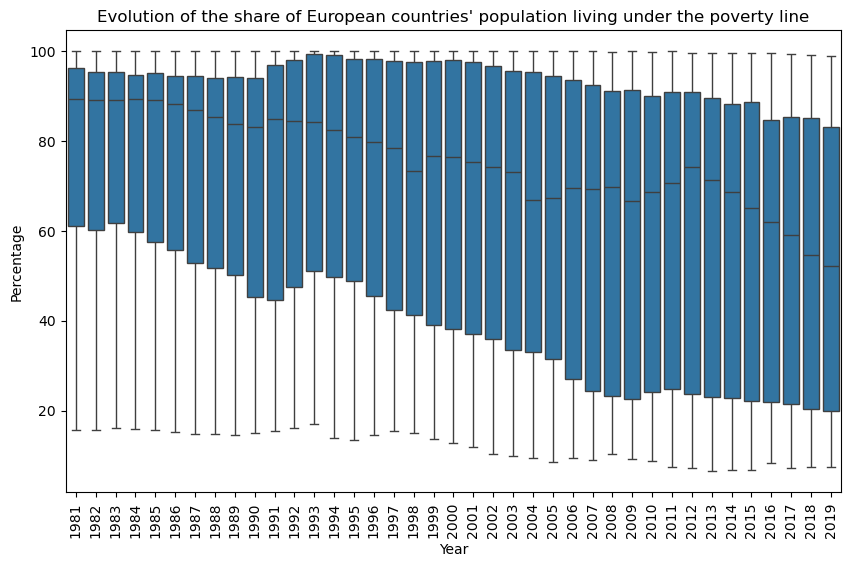

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Year", y="Percentage", data=df)
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title(
    "Evolution of the share of European countries' population living under the poverty line"
)
plt.show()

In [207]:
# Load data and rename columns
df2 = poverty_data[poverty_data["Year"] == 2015]
df2 = df2[["Entity", "Percentage"]]
df2.columns = ["Country", "Percentage"]
df2 = df2.set_index("Country")

df2.head()

,Percentage
Country,
Albania,99.17554
Algeria,99.06030
Angola,99.60445
Argentina (Urban),81.55458
Armenia,98.59429


In [ ]:
# Load data and rename columns
data = pd.read_csv("../data/hdi_2015/human_development.csv")

df = data.set_index("Country")
df = df[["Human Development Index (HDI)", "Life Expectancy at Birth", "Expected Years of Education", "Gross National Income (GNI) per Capita"]]
df.columns = ["HDI", "Life Expectancy at Birth", "Expected Years of Education", "GNI per Capita"]
df["GNI per Capita"] = df["GNI per Capita"].apply(lambda e: e.replace(",", "")).astype("float64")

df = df.join(df2, on="Country")

# Drop unused columns
df = df.drop("HDI", axis=1)

df = df.dropna(axis=0)

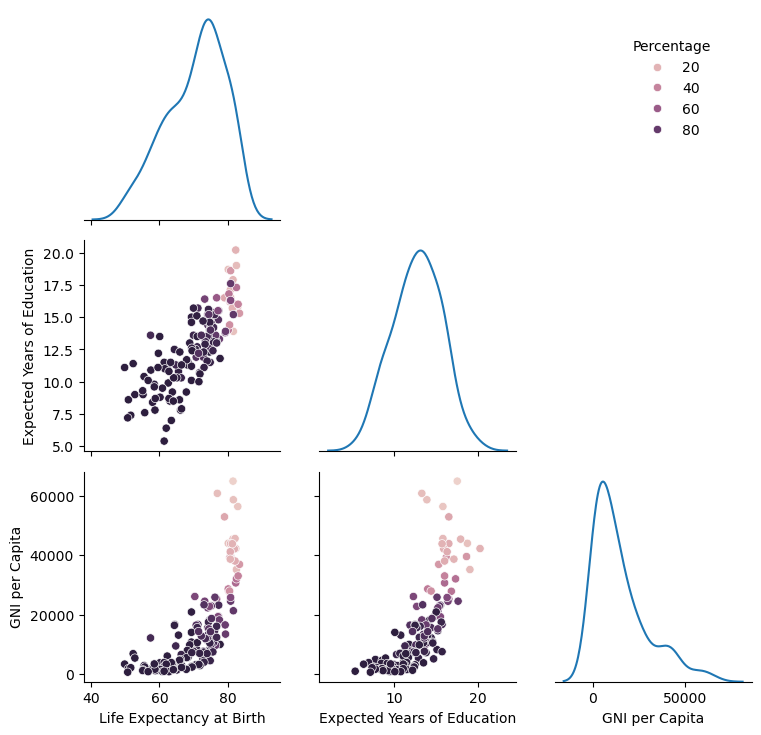

In [222]:
g = sns.PairGrid(df, hue="Percentage", diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, hue=None)
g.add_legend()
sns.move_legend(g, "upper right", bbox_to_anchor=(.85, 0.95), frameon=False)